In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize
data=pd.read_csv("levelups_panel_20240717.csv", encoding="utf-8")

In [48]:
# level_to 컬럼의 값이 100을 넘는 행 제거
data = data[data['level_to'] <= 100]
data['binge'] = (data['first_session_level'] >= 50).astype(int)
# 각 player_slug별로 비율 계산
data['prev_interval'] = data.groupby('player_slug')['interval'].shift(1)
data['interval_ratio'] = data.apply(lambda row: row['interval'] / (row['prev_interval'] if pd.notnull(row['prev_interval']) else row['interval']), axis=1)
#data.to_csv("LV100.csv",index=False, encoding="utf-8")


In [49]:
data_ratio_term = data[['player_slug','binge', 'level_to', 'interval_ratio']]

# 데이터 피벗
pivot_data_ratio = data_ratio_term.pivot_table(index='player_slug', columns='level_to', values='interval_ratio', aggfunc='mean')
binge_series = data.drop_duplicates('player_slug').set_index('player_slug')['binge']
pivot_data_ratio = pivot_data_ratio.join(binge_series)
pivot_data_ratio[pivot_data_ratio > 10] = np.nan

pivot_data_reset = pivot_data_ratio.reset_index().melt(id_vars=['player_slug', 'binge'], var_name='level_to', value_name='interval_ratio')


In [50]:
data_ratio_term = data[['player_slug','binge', 'level_to', 'interval']]

# 데이터 피벗
pivot_data_ratio = data_ratio_term.pivot_table(index='player_slug', columns='level_to', values='interval', aggfunc='mean')
binge_series = data.drop_duplicates('player_slug').set_index('player_slug')['binge']
pivot_data_ratio = pivot_data_ratio.join(binge_series)
pivot_data_ratio[pivot_data_ratio > 100] = np.nan

pivot_data_reset = pivot_data_ratio.reset_index().melt(id_vars=['player_slug', 'binge'], var_name='level_to', value_name='interval')


In [21]:
pivot_data_ratio.to_csv("20240718_LV100_Final.csv", encoding="utf-8")

In [51]:
sampled_data = pivot_data_ratio.sample(n=50000, random_state=102)
sampled_data.to_csv("20240718_LV100_hour.csv", encoding="utf-8")

In [52]:
sampled_data

,2,3,4,5,6,7,8,9,10,11,...,92,93,94,95,96,97,98,99,100,binge
player_slug,,,,,,,,,,,,,,,,,,,,,
2021-12-19T14:42:01.626Z,0.008056,0.006389,0.011944,0.014444,0.022778,0.020556,0.023056,0.026667,0.033333,0.037778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-08T12:53:50.466Z,0.008056,0.004722,0.014722,0.016667,0.020833,0.026389,0.028611,0.033889,0.037500,0.049444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-12-20T03:18:15.702Z,0.012500,0.009444,0.027500,0.018889,2.735278,0.023611,2.257778,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-02-03T05:55:24.709Z,0.007778,0.003889,0.011667,0.014722,0.014722,0.021389,0.022778,0.030000,0.031667,0.044444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-02-15T15:11:48.056Z,0.007500,0.004444,0.019722,0.015278,0.017222,0.023056,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-06T09:35:07.141Z,0.013333,0.005000,0.016111,0.013889,0.026667,0.128889,0.072778,0.032222,0.034167,24.080000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-01-25T15:55:19.376Z,0.009444,0.004722,0.008889,0.023611,0.014444,0.026389,0.024167,0.062222,0.040556,0.045278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-18T09:03:22.286Z,0.030556,0.015000,0.021944,0.022500,0.068056,0.034722,0.057500,0.101944,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [38]:
column_medians = pivot_data_ratio.median(skipna=True)
column_std = pivot_data_ratio.std(skipna=True)
column_std

2        31.573252
3         8.346157
4        16.823215
5         6.828521
6        20.504365
           ...    
97       26.424682
98       26.944047
99       47.791468
100      32.462334
binge     0.412065
Length: 100, dtype: float64

## Synthetic Control method

In [53]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize

def synthetic_control(data, preprocess_period):
    data_filled = data.copy()
    columns_to_process = data.columns[:preprocess_period]
    
    for column in tqdm(columns_to_process, desc='Processing columns'):
        if data[column].isna().sum() > 0:
            # 결측치가 있는 행과 없는 행 분리
            complete_cases = data.dropna(subset=[column])
            incomplete_cases = data[data[column].isna()]
            
            if complete_cases.shape[0] < 2:  # 충분한 데이터가 없는 경우 스킵
                continue
            
            # X0: 대조군 데이터, X1: 처리 유닛 데이터
            X0 = complete_cases.drop(columns=[column]).values
            X1 = complete_cases[column].values
            
            def objective(weights):
                return np.sum((X1 - X0.dot(weights)) ** 2)
            
            cons = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
            bounds = [(0, 1)] * X0.shape[1]
            initial_weights = np.ones(X0.shape[1]) / X0.shape[1]
            
            result = minimize(objective, initial_weights, bounds=bounds, constraints=cons)
            weights = result.x
            
            # 결측치 채우기
            for idx in incomplete_cases.index:
                donor_values = data_filled.loc[idx, complete_cases.columns != column].values
                donor_values = donor_values[~np.isnan(donor_values)]  # 결측치가 없는 값만 사용
                if len(donor_values) == len(weights):
                    imputed_value = donor_values.dot(weights)
                    data_filled.at[idx, column] = imputed_value
                else:
                    # 차원이 맞지 않는 경우 가중치를 조정
                    if len(donor_values) < len(weights):
                        adjusted_weights = weights[:len(donor_values)]
                    else:
                        adjusted_weights = np.pad(weights, (0, len(donor_values) - len(weights)), 'constant')
                    imputed_value = donor_values.dot(adjusted_weights)
                    data_filled.at[idx, column] = imputed_value
    return data_filled
pivot_data_ratio =pd.read_csv("20240718_LV100_Final.csv",encoding='utf-8')

pivot_data_ratio_reset = pivot_data_ratio.reset_index(drop=True)
player_slug_backup = pivot_data_ratio_reset['player_slug']
pivot_data_ratio_dropped = pivot_data_ratio_reset.drop(columns=['player_slug'])



# 전처리 기간 설정 (예: 50)
preprocess_period = 50
#pivot_data_ratio_refined = pivot_data_ratio.iloc[:preprocess_period]

# 결측값 채우기
pivot_data_ratio_refined = synthetic_control(pivot_data_ratio_dropped, preprocess_period)
pivot_data_ratio_refined.insert(0, 'player_slug', player_slug_backup)




Processing columns: 100%|██████████| 50/50 [07:19<00:00,  8.79s/it]


In [1]:

pivot_data_ratio_refined.to_csv("Synthetic_LV50.csv",encoding='utf-8',index=False)

NameError: name 'pivot_data_ratio_refined' is not defined

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
file_path = 'Synthetic_LV50.csv'
data = pd.read_csv(file_path,encoding='utf-8')


# 'binge' 컬럼을 제외하고 melt
melted_data = data.melt(id_vars=['player_slug'], value_vars=[str(i) for i in range(2, 101)], var_name='level', value_name='value')

# 'level'을 숫자로 변환
melted_data['level'] = melted_data['level'].astype(int)


In [3]:
# 데이터 전처리: 'binge'를 hue로 사용하기 위해 melt
melted_data = data.melt(id_vars=['player_slug', 'binge'], var_name='level', value_name='value')

# 'level'을 숫자로 변환
melted_data['level'] = melted_data['level'].astype(int)

# 레벨 50 이상인 데이터 제외
filtered_data = melted_data[melted_data['level'] <= 50]


In [4]:
filtered_data

,player_slug,binge,level,value
0,2021-10-31T16:01:57.631Z,0,2,1.000000
1,2021-10-31T23:13:52.512Z,0,2,1.000000
2,2021-11-01T00:29:22.357Z,0,2,1.000000
3,2021-11-01T03:34:17.980Z,0,2,1.000000
4,2021-11-01T05:12:15.383Z,0,2,1.000000
...,...,...,...,...
2907753,2022-03-30T13:53:30.032Z,0,50,0.276205
2907754,2022-03-30T14:09:03.502Z,0,50,0.024281
2907755,2022-03-30T14:13:23.546Z,0,50,0.068433
2907756,2022-03-30T14:20:04.049Z,0,50,0.065520


In [5]:
# 레벨 50 이상인 데이터 제외
filtered_data = melted_data[melted_data['level'] <= 50]


In [7]:
filtered_data

,player_slug,binge,level,value
0,2021-10-31T16:01:57.631Z,0,2,1.000000
1,2021-10-31T23:13:52.512Z,0,2,1.000000
2,2021-11-01T00:29:22.357Z,0,2,1.000000
3,2021-11-01T03:34:17.980Z,0,2,1.000000
4,2021-11-01T05:12:15.383Z,0,2,1.000000
...,...,...,...,...
2907753,2022-03-30T13:53:30.032Z,0,50,0.276205
2907754,2022-03-30T14:09:03.502Z,0,50,0.024281
2907755,2022-03-30T14:13:23.546Z,0,50,0.068433
2907756,2022-03-30T14:20:04.049Z,0,50,0.065520


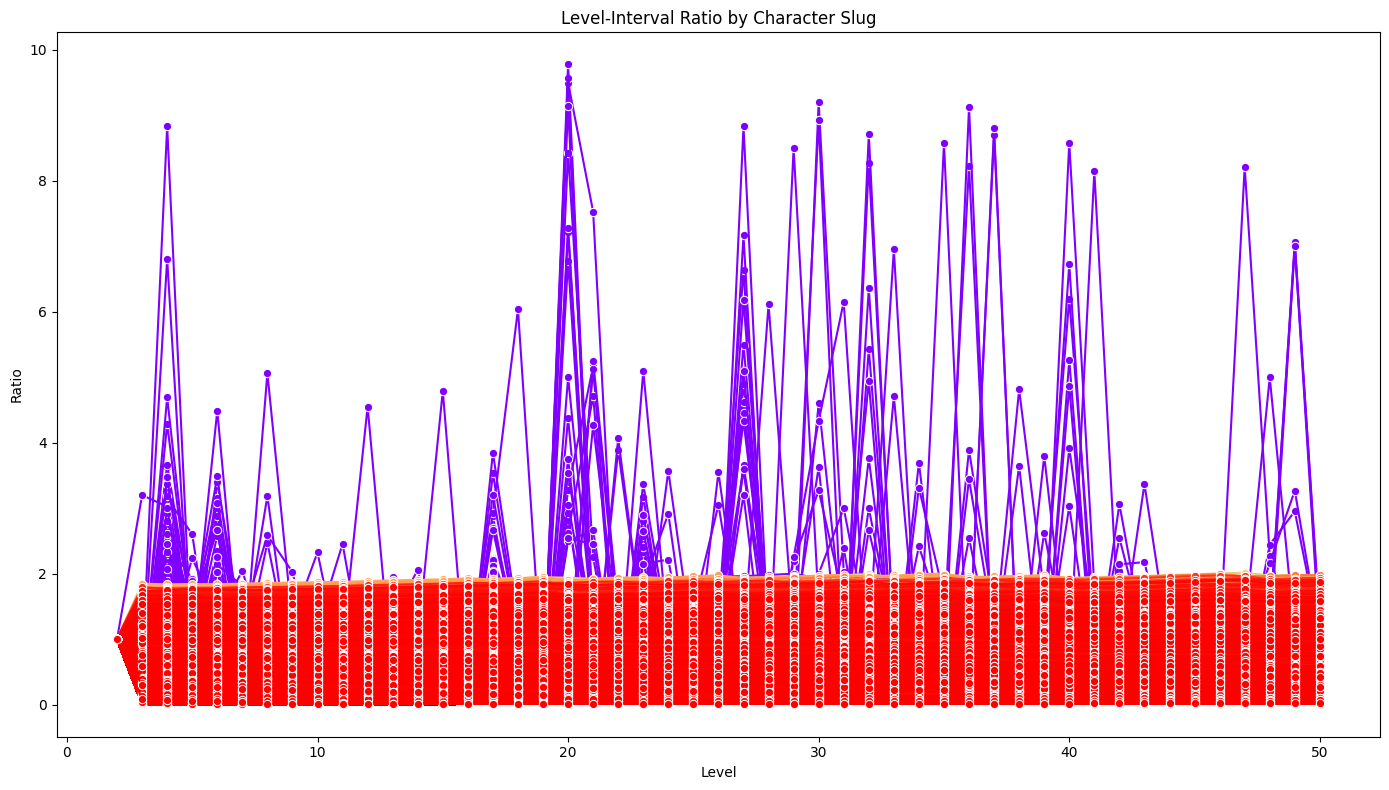

In [6]:
# 플롯 생성
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_data, x='level', y='value', hue='player_slug', palette='rainbow', marker='o', legend=False)

# 플롯 커스터마이징
plt.title('Level-Interval Ratio by Character Slug')
plt.xlabel('Level')
plt.ylabel('Ratio')

# 플롯 표시
plt.tight_layout()
plt.show()

C:\Users\sunwoong\AppData\Local\Temp\ipykernel_11772\2738014469.py:11: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  plt.tight_layout()
C:\Users\sunwoong\AppData\Local\Temp\ipykernel_11772\2738014469.py:11: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  plt.tight_layout()
C:\Users\sunwoong\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sunwoong\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


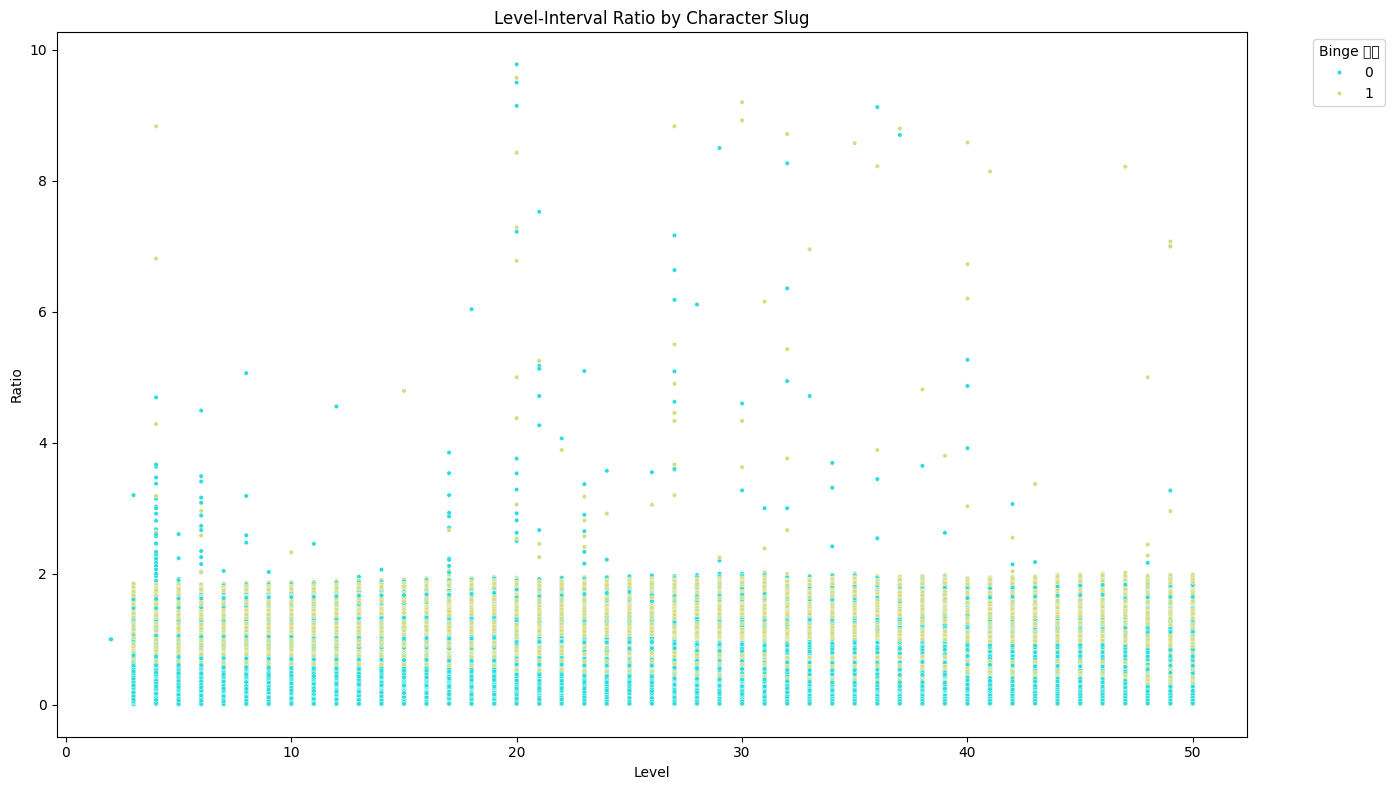

In [16]:

plt.figure(figsize=(14, 8))
#sns.lineplot(data=filtered_data, x='level', y='value', hue='binge', palette='rainbow', marker='o')
sns.scatterplot(data=filtered_data, x='level', y='value', hue='binge', palette='rainbow', s=10)

# 플롯 커스터마이징
plt.title('Level-Interval Ratio by Character Slug')
plt.xlabel('Level')
plt.ylabel('Ratio')
plt.legend(title='Binge', bbox_to_anchor=(1.05, 1), loc='upper left')
# 플롯 표시
plt.tight_layout()
plt.show()

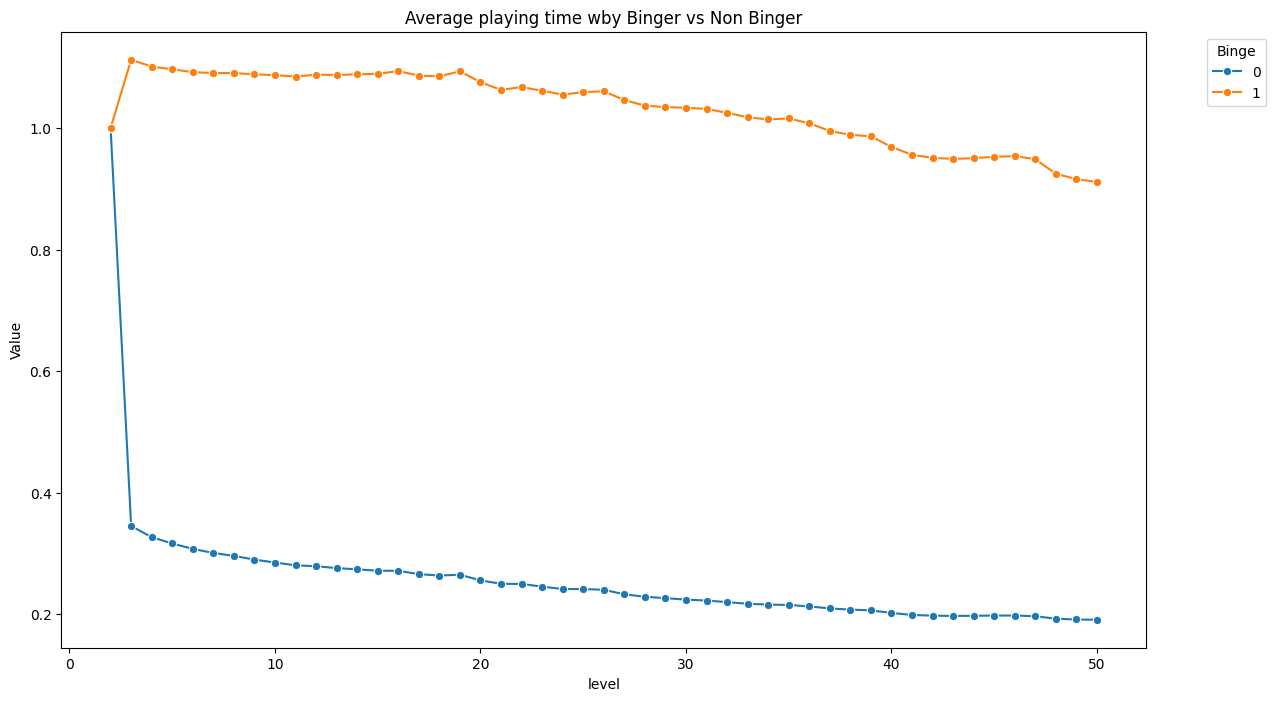

In [18]:
# binge 여부에 따라 레벨 별 평균 value 계산
avg_values = filtered_data.groupby(['binge', 'level'])['value'].mean().reset_index()

# 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_values, x='level', y='value', hue='binge', marker='o')

plt.title('Average playing time wby Binger vs Non Binger')
plt.xlabel('level')
plt.ylabel('Value')
plt.legend(title='Binge', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Function to fill missing values using Synthetic Control Method
def fill_missing_values(data, control_columns):
    for col in control_columns:
        if data[col].isna().sum() > 0:
            treated = data[col]
            treated_non_na = treated.dropna()
            
            # Ensure we have enough data to build the model
            if len(treated_non_na) < 2:
                continue

            # Pre-treatment period data for the current column
            pre_treatment_controls = pre_treatment_period[control_columns].loc[treated_non_na.index.intersection(pre_treatment_period.index)]


            # Ensure the dimensions are consistent
            if pre_treatment_controls.shape[0] != treated_non_na.shape[0]:
                continue

            # Define and solve the optimization problem
            n_controls = pre_treatment_controls.shape[1]
            W = cp.Variable(n_controls)
            objective = cp.Minimize(cp.sum_squares(treated_non_na.values - pre_treatment_controls.values @ W))
            constraints = [cp.sum(W) == 1, W >= 0]

            problem = cp.Problem(objective, constraints)
            problem.solve()

            # Calculate synthetic control
            weights = W.value
            synth_control = data[control_columns] @ weights

            # Fill missing values
            data[col] = data[col].combine_first(synth_control)
    
    return data